# Beautiful Soup Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [16]:
# Dependencies and Setup
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Set up browser
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.


In [18]:
# Visit the website - https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

In [19]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(browser.html,'html.parser')

In [20]:
# Extract all rows of data
data = soup.find_all('tr',class_ = 'data-row')
print(data)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [21]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows
for i in data:
    data_row = i.find_all('td')    
    data_row_list = []
    data_dict = {}
    for j in data_row:
        data_row_list.append(j.text)
    data_dict['id'] = data_row_list[0]
    data_dict['terrestrial_date'] = data_row_list[1]
    data_dict['sol'] = data_row_list[2]
    data_dict['ls'] = data_row_list[3]
    data_dict['month'] = data_row_list[4]
    data_dict['min_temp'] = data_row_list[5]
    data_dict['pressure'] = data_row_list[6]
    data_list.append(data_dict)
print(data_list)

[{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}, {'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}, {'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}, {'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}, {'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'mi

In [22]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_list)

In [23]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column.  Convert the data to the appropriate `datetime`, `int`, or `float` data types.


In [24]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [25]:
# Change data types for data analysis
df['terrestrial_date']= pd.to_datetime(df['terrestrial_date'])
df[['sol','ls','month']]=df[['sol','ls','month']].astype(int)
df[['min_temp','pressure']]=df[['min_temp','pressure']].astype(float)

In [26]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars? - **12**
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset? - **1867**
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.

    - **Coldest: 3rd Month**
    - **Warmest: 8th Month**

4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.

    - **Lowest: 6th Month**
    - **Highest: 9th Month**

5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.
    
    - **There are approximately 600 to 625 days in a Martian year.**

In [27]:
# 1. How many months are there on Mars?
df['month'].nunique()

12

In [28]:
# 2. How many sols (Martian days) worth of data are there?
df['sol'].nunique()

1867

In [29]:
# 3. What is the average minimum temperature by month?
mean_min_temp = df[['month','min_temp']].groupby(['month'])['min_temp'].mean()
mean_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

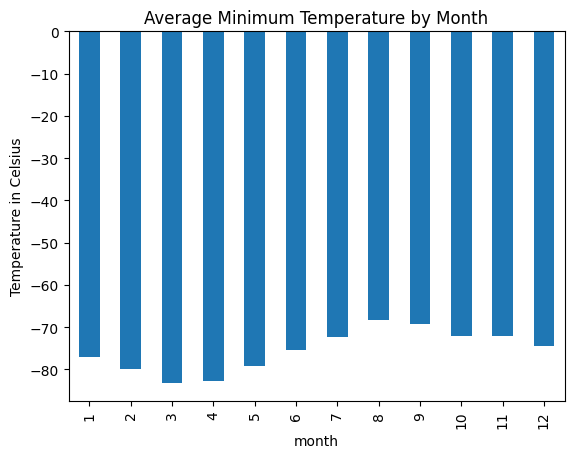

In [30]:
# Plot the average minimum temperature by month
mean_min_temp.plot(kind = 'bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()

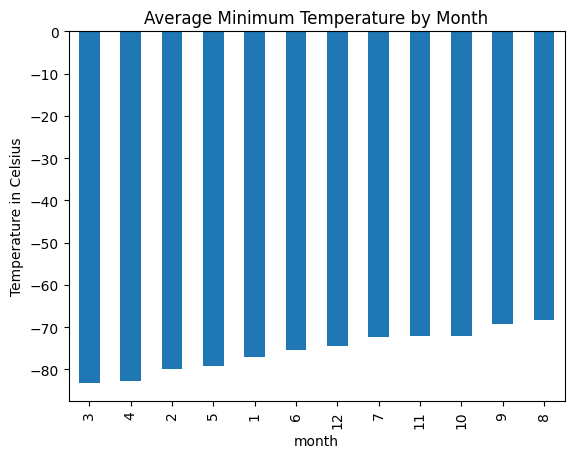

In [31]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
mean_min_temp = mean_min_temp.sort_values(ascending = True)
mean_min_temp.plot(kind = 'bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [32]:
# 4. What is the average pressure by month?
mean_pressure = df[['month','pressure']].groupby(['month'])['pressure'].mean()
mean_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

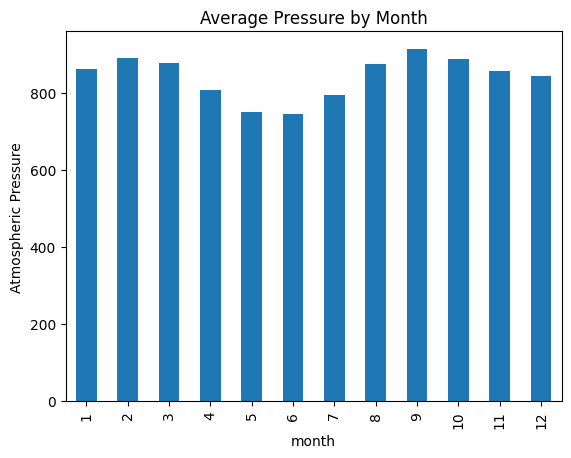

In [33]:
# Plot the average pressure by month
mean_pressure.plot(kind = 'bar')
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

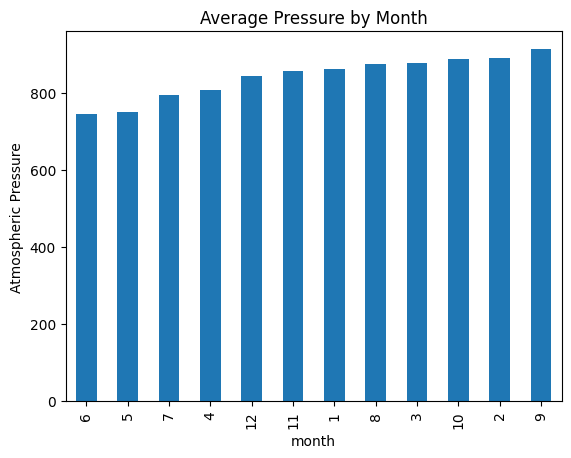

In [34]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
mean_pressure = mean_pressure.sort_values(ascending = True)
mean_pressure.plot(kind = 'bar')
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

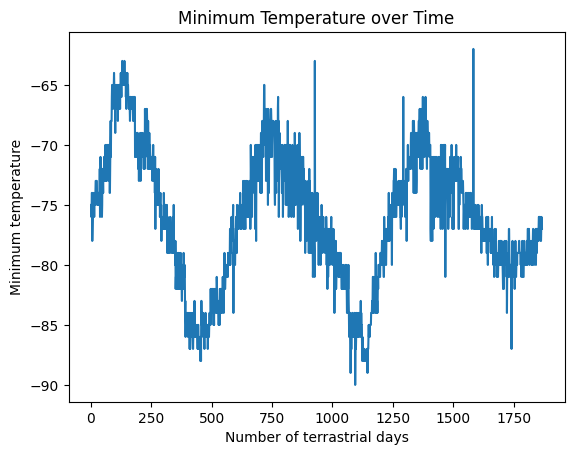

In [35]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(list(range(1,len(df)+1)), df['min_temp'])
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrastrial days')
plt.ylabel('Minimum temperature')
plt.show()

#### Minimum Temperature

The data was grouped by month and the mean() command was used to determine the average minimum temperature per month. The data was then plotted as a bar graph twice (unsorted and sorted by minimum temperature). From here, it was determined the coldest month on Mars is the 3rd month and the warmest month on Mars is the 8th month.

#### Atmospheric Pressure

The data was grouped by month and the mean() command was used to determine the average atmospheric pressure per month. The data was then plotted as a bar graph twice (unsorted and sorted by atmospheric pressure). From here, it was determined the month with the lowest atmospheric pressure on Mars is the 6th month and the month with the highest atmospheric pressure on Mars is the 9th month.

#### Year Length

To determine the approximate number of Earth days that are in a year on Mars, the days in the dataset were plotted against the minimum temperature. The visualization shows a cycle similar to a sine wave. Using this visualization, the approximate length of a year on Mars is 600 to 625 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [36]:
# Write the data to a CSV
df.to_csv('output.csv')

In [37]:
# Exit the browser
browser.quit()